In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
# 파일 경로
features_path = 'features.csv'
store_path = 'stores.csv'
walmart_train_path = 'walmart_train.csv'


# 데이터 불러오기
features = pd.read_csv(features_path)
store = pd.read_csv(store_path)
train = pd.read_csv(walmart_train_path)
train1 = pd.read_csv(walmart_train_path)
df5 = train1

In [55]:
# 날짜 데이터 처리 => 데이터 전처리
df5["Date"] = pd.to_datetime(df5["Date"])
df5['Year'] = df5['Date'].dt.year
df5['Month'] = df5['Date'].dt.month
df5['Day'] = df5['Date'].dt.day
df5['Week'] = df5['Date'].apply(lambda x: x.isocalendar()[1])

In [72]:

# isHoliday, Year 인코딩 => 데이터 전처리
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df5['IsHoliday_le'] = le1.fit_transform(df5['IsHoliday'])
df5['Year_le'] = le2.fit_transform(df5['Year'])
# 'type' 열에 레이블 인코딩 적용
df5

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,IsHoliday_le,Year_le,type_le
0,1,1,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0,0
1,1,2,50605.27,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0,0
2,1,3,13740.12,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0,0
3,1,4,39954.04,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0,0
4,1,5,32229.38,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,2,1
421566,45,94,5203.31,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,2,1
421567,45,95,56017.47,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,2,1
421568,45,97,6817.48,False,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,2,1


In [77]:
# Type, MarkDown1-5 제거 => 초기변수 선택 . (mask제외컬럼) # 히트맵(스토어/부서)지표 넣기
df5 = df5.drop('IsHoliday', axis=1)
df5

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,IsHoliday_le,type_le
0,1,1,24924.50,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0
1,1,2,50605.27,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0
2,1,3,13740.12,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0
3,1,4,39954.04,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0
4,1,5,32229.38,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,1
421566,45,94,5203.31,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,1
421567,45,95,56017.47,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,1
421568,45,97,6817.48,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,26,0,1


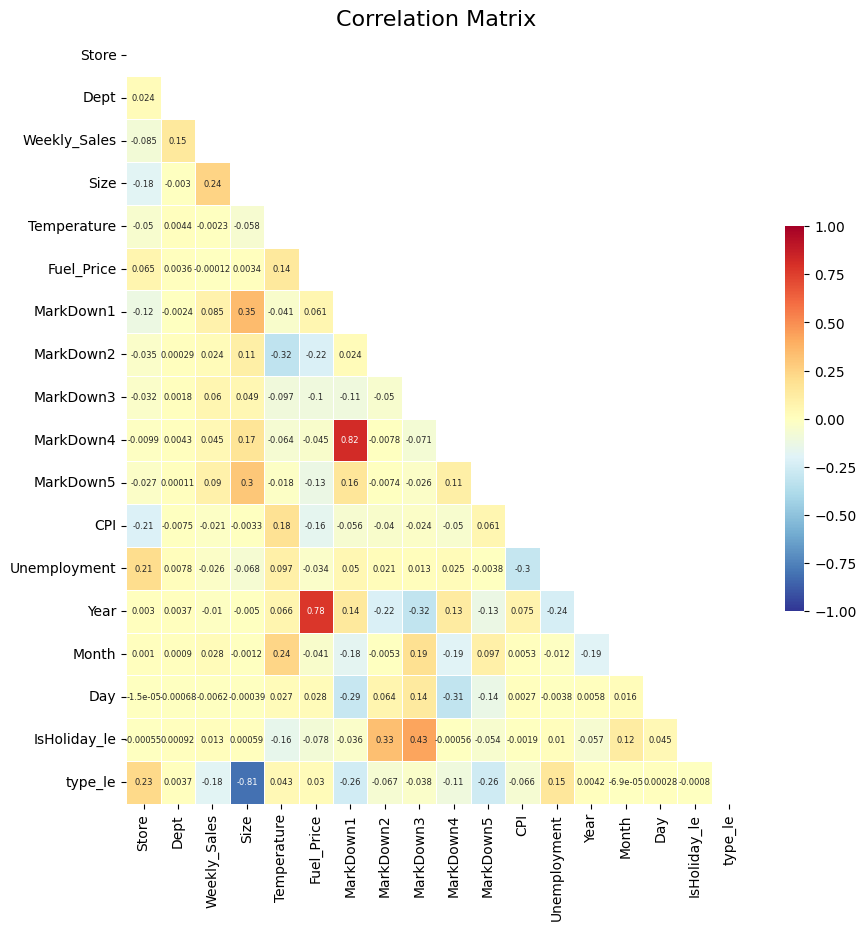

In [78]:
plt.figure(figsize=(10, 10))
mask = np.zeros_like(df5.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df5.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask=mask,      # 표시하지 않을 마스크 부분 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={'size':6}
           )  
# 축 레이블 및 타이틀 설정
plt.title('Correlation Matrix', fontsize=16)  # 타이틀의 글씨 크기
plt.show()

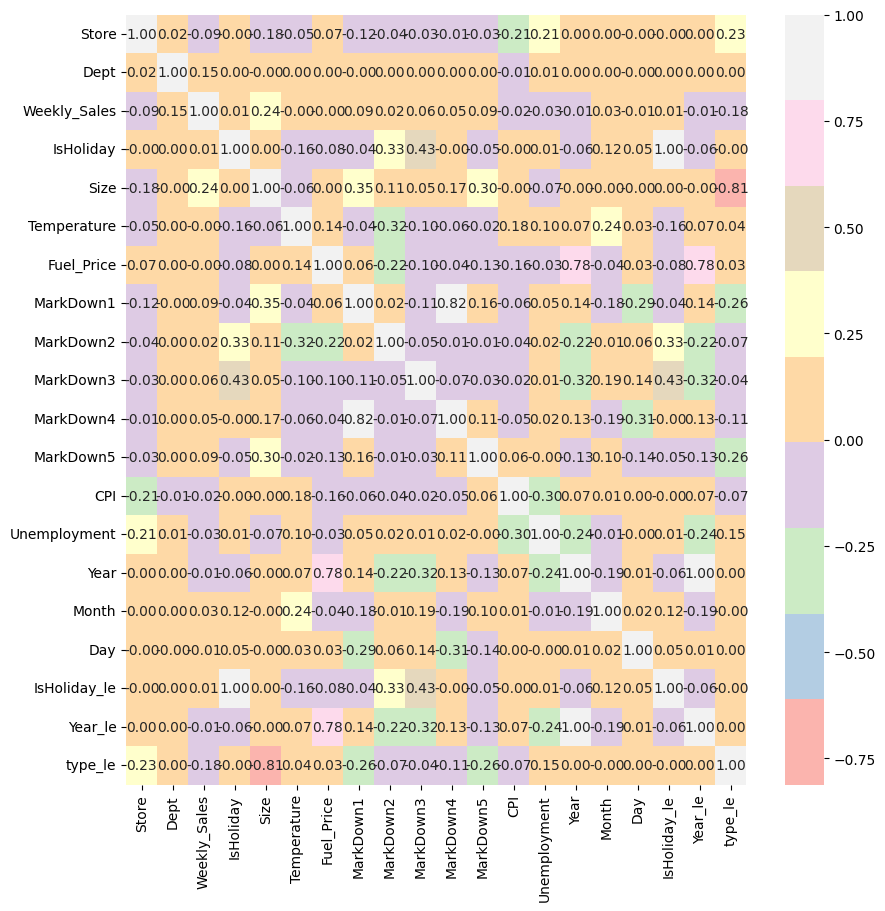

In [ ]:
#데이트 제외한 로우데이터 히트맵
plt.figure(figsize=(10, 10))
# 하삼각형 마스크 생성
mask = np.tril(np.ones_like(df5, dtype=bool))
#히트맵코드
sns.heatmap(df5.corr(), annot = True, fmt='.2f',cmap='Pastel1')
plt.show()

In [ ]:
df = train.copy()

In [ ]:
# 난수
random_state = 73
# FFC220 노란색이라 강조하실때 쓰면 좋을것 같습니다!
walmart = ['#041E42','#00336D','#0052AA','#0071DC','#57AEFF','#FFC220']


In [ ]:
df.head()

In [ ]:
# Type, MarkDown1-5 제거 => 초기변수 선택 . (mask제외컬럼) # 히트맵(스토어/부서)지표 넣기
df = train.copy()
mask = ['Type','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

df = train.drop(columns=mask)

# 날짜 데이터 처리 => 데이터 전처리
df["Date"] = pd.to_datetime(df["Date"])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].apply(lambda x: x.isocalendar()[1])


# isHoliday, Year 인코딩 => 데이터 전처리
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

df['IsHoliday_le'] = le1.fit_transform(df['IsHoliday'])
df['Year_le'] = le2.fit_transform(df['Year'])


In [ ]:
# 데이터 프레임 정보 확인
df_info = df.info()

(df.head())

In [ ]:
#데이트 삭제
df1 = df.drop('Date', axis=1)
df1.head()

In [ ]:

#히트맵
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot = True, fmt='.2f',cmap='coolwarm')
plt.show()

In [ ]:
# 필요한 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler

In [ ]:
# 스케일링
# 나영
# Store-Size Scaling
store_sd = StandardScaler()

store_sd.fit(store[['Size']])


# Store-Size Scaler df에 적용
df['Size_sd'] = store_sd.transform(df[['Size']])

In [ ]:
# feature 스케일링할 열 목록
columns_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [ ]:
# 스케일링 진행
scaler = StandardScaler()
scaler.fit(features[columns_to_scale])

In [ ]:
#데이터프레임열에 붙이기(컬럼명 만들기)
col_names = ['Temperature_sd', 'Fuel_Price_sd', 'CPI_sd', 'Unemployment_sd']

#4개 컬럼 생성 트랜스폼.
df[col_names] = scaler.transform(df[columns_to_scale])

df

In [ ]:
# 종속 변수와 독립 변수 정의
X = df[['Store', 'Dept', 'Temperature_sd', 'Year_le', 'Month', 'Day', 'IsHoliday_le', 'Fuel_Price_sd', 'CPI_sd', 'Unemployment_sd', 'Size_sd']]
y = df['Weekly_Sales'] # 실제 데이터셋에 존재하는 'Weekly_Sales' 변수 사용

# 데이터 분할 (7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle= True, stratify = df['IsHoliday'] ,random_state=73)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Gradient Boosting Regressor 모델 학습

model_GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=73)
model_GBR.fit(X_train, y_train)

In [ ]:
# predict
y_pred = model_GBR.predict(X_test)

In [ ]:
# mse/ 
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2_score = r2_score(y_test, y_pred)

print(f'GBM MSE: {round(mse, 4)}')
print(f'GBM RMSE: {round(rmse, 4)}')
print(f'GBM R2SCORE: {round(r2_score, 4)}')

In [ ]:
# 모델의 특성 중요도 출력
print(f'Feature Importances: {model_GBR.feature_importances_}')

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
def WMAE(y_true, y_pred):
    w = df['IsHoliday'].apply(lambda x: 5 if x else 1)
    return np.round(np.sum(w*abs(y_true - y_pred)) / (np.sum(w)), 4)
    

In [ ]:
def ER(y_true, y_pred, bin=30000):
    # y_true가 0인 데이터 제외 (walmart의 test데이터의 경우 18개)
    df_y = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    df_y = df_y[df_y['y_true'] != 0]

    # bin 기준으로 오차비율 확인
    # 하위
    y_true = df_y.loc[df_y['y_true']<=bin,'y_true']
    y_pred = df_y.loc[df_y['y_true']<=bin,'y_pred']
    ER_low = np.round(np.mean(abs((y_true - y_pred)/y_true)), 4)

    # 상위
    y_true = df_y.loc[df_y['y_true']>bin,'y_true']
    y_pred = df_y.loc[df_y['y_true']>bin,'y_pred']
    ER_high = np.round(np.mean(abs((y_true - y_pred)/y_true)), 4)
    return (ER_low, ER_high)



In [ ]:
def get_score(model, y_true, y_pred, bin=30000):
    model_name = ''.join(filter(str.isalpha, str(type(model)).split('.')[-1]))
    wmae = WMAE(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    er = ER(y_true, y_pred, bin)
    print(f'{model_name}\nWMAE : {wmae}\nRMSE : {rmse:.4f}\nR2 : {r2:.4f}\nER(low,high) : {er}  기준 : {bin}')

In [ ]:
get_score(model_GBR,y_test, y_pred)

ver2 cpi만 살리고 다른 경제지표 날리기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# train, test split
from sklearn.model_selection import train_test_split

# 주간 경제지표들 중 설명력 있는 CPI만 사용
X2 = df[['Store','Dept','Year_le','Month','Day','IsHoliday_le','Size_sd','Temperature_sd','CPI_sd']]

X_train_2, X_test_2, y_train, y_test = train_test_split(X2, y, test_size= 0.3, shuffle = True, stratify=df['IsHoliday_le'], random_state= 73)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# fitting
model_GBR_2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state= 73)
model_GBR_2.fit(X_train_2,y_train)


In [ ]:
# predict
y_GBR_pred_2 = model_GBR_2.predict(X_test_2)

In [ ]:
get_score(model_GBR_2, y_test, y_GBR_pred_2)

VER.3 위클리로 월과 일 대체하기

In [ ]:
##train, test split
from sklearn.model_selection import train_test_split




In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Month, Day를 Week로 대치
X3 = df[['Store','Dept','Year_le','Week','IsHoliday_le','Size_sd','Temperature_sd','Fuel_Price_sd','CPI_sd','Unemployment_sd']]

X_train_3, X_test_3, y_train, y_test = train_test_split(X3, y, test_size= 0.3,  shuffle = True,stratify=df['IsHoliday_le'],random_state= 73)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# fitting
model_GBR_3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state= 73)
model_GBR_3.fit(X_train_3,y_train)

# predict
y_GBR_pred_3 = model_GBR_3.predict(X_test_3)

In [ ]:
get_score(model_GBR_3, y_test, y_GBR_pred_3)

Ver.4 두개 합친 버전

In [ ]:
##train, test split
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#위클리로 먼쓰와 데이 대치 + 경제지표 fuel과 unemployment 삭제
X4 = df[['Store','Dept','Year_le','Week','IsHoliday_le','Size_sd','Temperature_sd','CPI_sd']]

X_train_4, X_test_4, y_train, y_test = train_test_split(X4, y, test_size= 0.3,  shuffle = True, stratify=df['IsHoliday_le'], random_state= 73)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# fitting
model_GBR_4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state= 73)
model_GBR_4.fit(X_train_4,y_train)

# predict
y_GBR_pred_4 = model_GBR_4.predict(X_test_4)

In [ ]:
get_score(model_GBR_4, y_test, y_GBR_pred_4)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:

#히트맵
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt='.2f',cmap='coolwarm')
plt.show()